In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [45]:
df = pd.read_csv('/Users/kaciechong/Desktop/Residency.csv')
df = df[df.index % 2 == 0]
df

,Unnamed: 0,Unnamed: 1,Academic Year of Participation,Academic Year of Participation.1,Academic Year of Participation.2,Academic Year of Participation.3,Academic Year of Participation.4,Academic Year of Participation.5
0,NaN,NaN,2019-20,2020-21,2021-22,2022-23,2023-24,Grand Total
2,California Resident,% of Total Count As Participant Score along CA...,86.5%,36.1%,87.8%,85.1%,83.4%,85.1%
4,Non-Resident Domestic,% of Total Count As Participant Score along CA...,8.1%,NaN,8.8%,11.5%,13.4%,10.6%
6,Non-Resident International,% of Total Count As Participant Score along CA...,5.3%,63.9%,3.4%,3.4%,3.3%,4.3%


In [46]:
df = df.rename(columns={'Unnamed: 0': 'Residency'})
df = df.drop('Unnamed: 1', axis=1)
df = df.drop(0)
df = df.rename(columns={'Academic Year of Participation': '2019-20'})
df = df.rename(columns={'Academic Year of Participation.1': '2020-21'})
df = df.rename(columns={'Academic Year of Participation.2': '2021-22'})
df = df.rename(columns={'Academic Year of Participation.3': '2022-23'})
df = df.rename(columns={'Academic Year of Participation.4': '2023-24'})
df = df.rename(columns={'Academic Year of Participation.5': 'Grand Total'})
df = df.drop(columns=['Grand Total'])

In [47]:
df

,Residency,2019-20,2020-21,2021-22,2022-23,2023-24
2,California Resident,86.5%,36.1%,87.8%,85.1%,83.4%
4,Non-Resident Domestic,8.1%,NaN,8.8%,11.5%,13.4%
6,Non-Resident International,5.3%,63.9%,3.4%,3.4%,3.3%


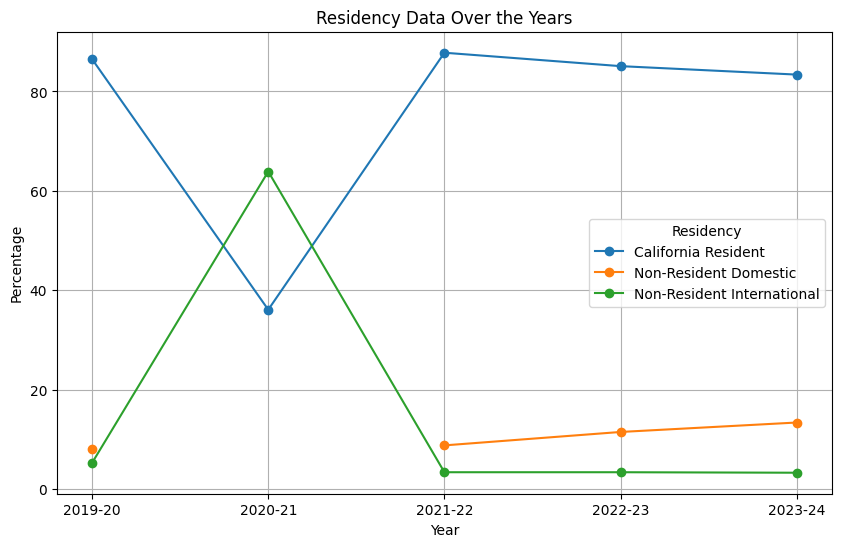

In [48]:
df['2019-20'] = df['2019-20'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['2020-21'] = df['2020-21'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['2021-22'] = df['2021-22'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['2022-23'] = df['2022-23'].replace({'%': '', ',': ''}, regex=True).astype(float)
df['2023-24'] = df['2023-24'].replace({'%': '', ',': ''}, regex=True).astype(float)


df.set_index('Residency', inplace=True)


# Plot the line chart
plt.figure(figsize=(10,6))
for residency in df.index:
    plt.plot(df.columns, df.loc[residency], label=residency, marker='o')

# Adding labels and title
plt.title('Residency Data Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Residency')
plt.grid(True)

desktop = os.path.join(os.path.expanduser('~'), 'Desktop')

save_path = os.path.join(desktop, 'Residency.png')

# Save the figure
plt.savefig(save_path, dpi=300)